## Loading and Preparing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
pd.set_option('display.max_columns', 50)

# Load CSV
DATA_PATH = 'airline_ticket_dataset.csv'
df = pd.read_csv(DATA_PATH)

# Convert dollar and comma-formatted columns to numeric (CSV may have $ and ",")
def to_numeric(ser):
    if ser.dtype == object:
        return pd.to_numeric(ser.astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False), errors='coerce')
    return ser
for col in ['fare', 'fare_lg', 'fare_low', 'passengers', 'nsmiles']:
    if col in df.columns:
        df[col] = to_numeric(df[col])

df.head(10)

,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,TotalFaredPax_city1,TotalPerLFMkts_city1,TotalPerPrem_city1,TotalFaredPax_city2,TotalPerLFMkts_city2,TotalPerPrem_city2
0,2025,2,32467,31703,"Miami, FL (Metropolitan Area)","New York City, NY (Metropolitan Area)",1118,17955,208.52,B6,0.2551,191.48,B6,0.2551,191.48,4.322090e+06,0.885900,-0.065800,2.978413e+06,0.821150,-0.032867
1,2025,2,32575,32457,"Los Angeles, CA (Metropolitan Area)","San Francisco, CA (Metropolitan Area)",372,17310,157.68,WN,0.5006,169.03,AS,0.1193,140.59,2.822942e+06,0.865080,-0.038060,3.284783e+06,0.880833,-0.051467
2,2025,2,32575,31703,"Los Angeles, CA (Metropolitan Area)","New York City, NY (Metropolitan Area)",2510,13648,430.38,DL,0.2535,526.21,B6,0.2272,365.63,2.822942e+06,0.865080,-0.038060,2.978413e+06,0.821150,-0.032867
3,2025,2,31703,31454,"New York City, NY (Metropolitan Area)","Orlando, FL",989,12627,186.50,B6,0.3735,186.10,B6,0.3735,186.10,2.978413e+06,0.821150,-0.032867,8.664260e+06,0.979700,-0.115500
4,2025,2,30977,31703,"Chicago, IL","New York City, NY (Metropolitan Area)",773,11284,221.33,UA,0.4328,238.62,AA,0.2426,217.36,5.402975e+06,0.775150,-0.007850,2.978413e+06,0.821150,-0.032867
5,2025,2,31703,32457,"New York City, NY (Metropolitan Area)","San Francisco, CA (Metropolitan Area)",2619,9663,452.08,UA,0.3418,520.87,AS,0.1619,313.36,2.978413e+06,0.821150,-0.032867,3.284783e+06,0.880833,-0.051467
6,2025,2,30397,31703,"Atlanta, GA (Metropolitan Area)","New York City, NY (Metropolitan Area)",795,8856,216.49,DL,0.5459,260.13,F9,0.1124,121.46,7.640240e+06,0.869200,0.127000,2.978413e+06,0.821150,-0.032867
7,2025,2,32575,30559,"Los Angeles, CA (Metropolitan Area)","Seattle, WA",978,7594,195.73,AS,0.6003,201.02,AS,0.6003,201.02,2.822942e+06,0.865080,-0.038060,6.438890e+06,0.561400,-0.063500
8,2025,2,31703,34027,"New York City, NY (Metropolitan Area)","West Palm Beach/Palm Beach, FL",1056,7054,223.88,B6,0.4850,208.07,B6,0.4850,208.07,2.978413e+06,0.821150,-0.032867,1.716910e+06,0.805100,0.102000
9,2025,2,30721,30852,"Boston, MA (Metropolitan Area)","Washington, DC (Metropolitan Area)",418,6898,191.75,WN,0.2454,184.34,B6,0.1727,180.01,2.777003e+06,0.892133,-0.023633,3.435623e+06,0.659900,0.045200


In [3]:
# Map to standard names (includes this dataset's columns: city1, city2, fare, nsmiles, etc.)
col_map = {
    'city1': 'origin', 'city2': 'dest',
    'Origin': 'origin', 'Origin City': 'origin_city', 'Origin Airport': 'origin',
    'Destination': 'dest', 'Destination City': 'dest_city', 'Destination Airport': 'dest',
    'fare': 'avg_fare', 'Average Fare': 'avg_fare', 'Fare': 'avg_fare', 'Avg Fare': 'avg_fare', 'Average Fare ($)': 'avg_fare',
    'Passengers': 'passengers', 'Passenger Count': 'passengers', 'Total Passengers': 'passengers',
    'quarter': 'quarter', 'Quarter': 'quarter', 'Year': 'year', 'Year-Quarter': 'year_quarter',
    'nsmiles': 'distance', 'Distance': 'distance', 'Miles': 'distance', 'Market Distance': 'distance',
    'carrier_lg': 'dominant_carrier', 'large_ms': 'dom_share', 'Dominant Carrier': 'dominant_carrier', 'Dominant Carrier Share': 'dom_share', 'Market Share': 'dom_share',
    'carrier_low': 'lowest_fare_carrier', 'lf_ms': 'lcc_share', 'Low Cost Carrier': 'lcc', 'LCC': 'lcc', 'LCC Penetration': 'lcc_penetration',
    'Lowest Fare Carrier': 'lowest_fare_carrier', 'Carriers': 'carriers', 'Number of Carriers': 'n_carriers',
}
rename = {k: v for k, v in col_map.items() if k in df.columns}
if rename:
    df = df.rename(columns=rename)
print('Columns after mapping:', list(df.columns))

# Basic info and missing values
df.info()
print('\nMissing values:')
print(df.isnull().sum())
df = df.dropna()

df.head(5)

Columns after mapping: ['year', 'quarter', 'citymarketid_1', 'citymarketid_2', 'origin', 'dest', 'distance', 'passengers', 'avg_fare', 'dominant_carrier', 'dom_share', 'fare_lg', 'lowest_fare_carrier', 'lcc_share', 'fare_low', 'TotalFaredPax_city1', 'TotalPerLFMkts_city1', 'TotalPerPrem_city1', 'TotalFaredPax_city2', 'TotalPerLFMkts_city2', 'TotalPerPrem_city2']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14004 entries, 0 to 14003
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  14004 non-null  int64  
 1   quarter               14004 non-null  int64  
 2   citymarketid_1        14004 non-null  int64  
 3   citymarketid_2        14004 non-null  int64  
 4   origin                14004 non-null  object 
 5   dest                  14004 non-null  object 
 6   distance              14004 non-null  int64  
 7   passengers            14004 non-null  int64  
 8   avg_fare   

,year,quarter,citymarketid_1,citymarketid_2,origin,dest,distance,passengers,avg_fare,dominant_carrier,dom_share,fare_lg,lowest_fare_carrier,lcc_share,fare_low,TotalFaredPax_city1,TotalPerLFMkts_city1,TotalPerPrem_city1,TotalFaredPax_city2,TotalPerLFMkts_city2,TotalPerPrem_city2
0,2025,2,32467,31703,"Miami, FL (Metropolitan Area)","New York City, NY (Metropolitan Area)",1118,17955,208.52,B6,0.2551,191.48,B6,0.2551,191.48,4.322090e+06,0.88590,-0.065800,2.978413e+06,0.821150,-0.032867
1,2025,2,32575,32457,"Los Angeles, CA (Metropolitan Area)","San Francisco, CA (Metropolitan Area)",372,17310,157.68,WN,0.5006,169.03,AS,0.1193,140.59,2.822942e+06,0.86508,-0.038060,3.284783e+06,0.880833,-0.051467
2,2025,2,32575,31703,"Los Angeles, CA (Metropolitan Area)","New York City, NY (Metropolitan Area)",2510,13648,430.38,DL,0.2535,526.21,B6,0.2272,365.63,2.822942e+06,0.86508,-0.038060,2.978413e+06,0.821150,-0.032867
3,2025,2,31703,31454,"New York City, NY (Metropolitan Area)","Orlando, FL",989,12627,186.50,B6,0.3735,186.10,B6,0.3735,186.10,2.978413e+06,0.82115,-0.032867,8.664260e+06,0.979700,-0.115500
4,2025,2,30977,31703,"Chicago, IL","New York City, NY (Metropolitan Area)",773,11284,221.33,UA,0.4328,238.62,AA,0.2426,217.36,5.402975e+06,0.77515,-0.007850,2.978413e+06,0.821150,-0.032867


## Feature Engineering

In [4]:
# fare
df["log_fare"] = np.log(df["avg_fare"])

# Distance
df["log_dist"] = np.log(df["distance"])
df["dist_sq"] = df["distance"] ** 2

# Market size for a route
df["market_size"] = df["TotalFaredPax_city1"] + df["TotalFaredPax_city2"]

# Competition index: How much market share is up for grabs after accounting for larges-share carrier 
df["comp_index"] = 1 - df["dom_share"]

# Engineering hub feature with threshold of the 80% quantile
threshold = df["TotalFaredPax_city1"].quantile(0.8)

df["hub_city1"] = (
    df["TotalFaredPax_city1"] > threshold
).astype(int)

df["hub_city2"] = (
    df["TotalFaredPax_city2"] > threshold
).astype(int)

df["has_hub"] = (df["hub_city1"] + df["hub_city2"] > 0).astype(int)

df["hub_to_hub"] = (df["hub_city1"] + df["hub_city2"] == 2).astype(int)

df.head(5)

,year,quarter,citymarketid_1,citymarketid_2,origin,dest,distance,passengers,avg_fare,dominant_carrier,dom_share,fare_lg,lowest_fare_carrier,lcc_share,fare_low,TotalFaredPax_city1,TotalPerLFMkts_city1,TotalPerPrem_city1,TotalFaredPax_city2,TotalPerLFMkts_city2,TotalPerPrem_city2,log_fare,log_dist,dist_sq,market_size,comp_index,hub_city1,hub_city2,has_hub,hub_to_hub
0,2025,2,32467,31703,"Miami, FL (Metropolitan Area)","New York City, NY (Metropolitan Area)",1118,17955,208.52,B6,0.2551,191.48,B6,0.2551,191.48,4.322090e+06,0.88590,-0.065800,2.978413e+06,0.821150,-0.032867,5.340035,7.019297,1249924,7.300503e+06,0.7449,0,0,0,0
1,2025,2,32575,32457,"Los Angeles, CA (Metropolitan Area)","San Francisco, CA (Metropolitan Area)",372,17310,157.68,WN,0.5006,169.03,AS,0.1193,140.59,2.822942e+06,0.86508,-0.038060,3.284783e+06,0.880833,-0.051467,5.060568,5.918894,138384,6.107725e+06,0.4994,0,0,0,0
2,2025,2,32575,31703,"Los Angeles, CA (Metropolitan Area)","New York City, NY (Metropolitan Area)",2510,13648,430.38,DL,0.2535,526.21,B6,0.2272,365.63,2.822942e+06,0.86508,-0.038060,2.978413e+06,0.821150,-0.032867,6.064669,7.828038,6300100,5.801355e+06,0.7465,0,0,0,0
3,2025,2,31703,31454,"New York City, NY (Metropolitan Area)","Orlando, FL",989,12627,186.50,B6,0.3735,186.10,B6,0.3735,186.10,2.978413e+06,0.82115,-0.032867,8.664260e+06,0.979700,-0.115500,5.228431,6.896694,978121,1.164267e+07,0.6265,0,1,1,0
4,2025,2,30977,31703,"Chicago, IL","New York City, NY (Metropolitan Area)",773,11284,221.33,UA,0.4328,238.62,AA,0.2426,217.36,5.402975e+06,0.77515,-0.007850,2.978413e+06,0.821150,-0.032867,5.399655,6.650279,597529,8.381388e+06,0.5672,1,0,1,0


## EDA and Summary Statistics

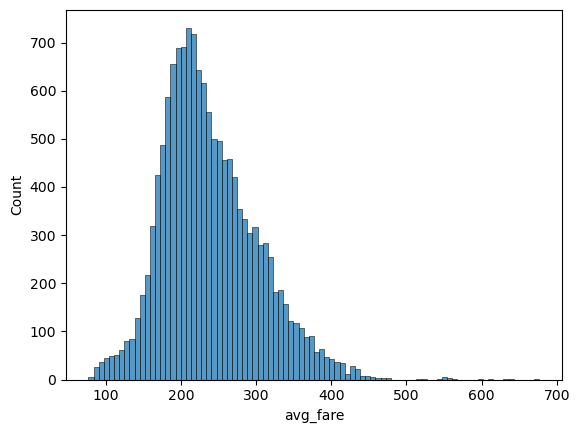

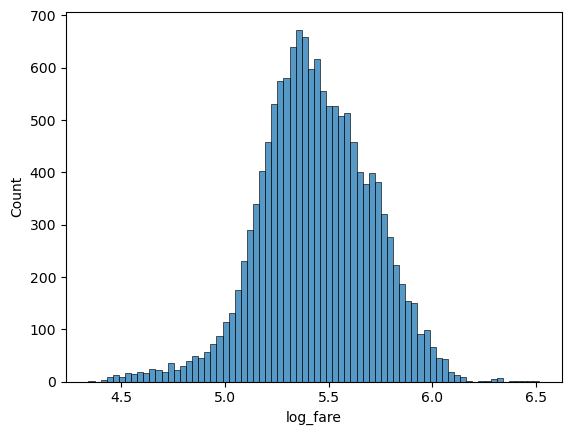

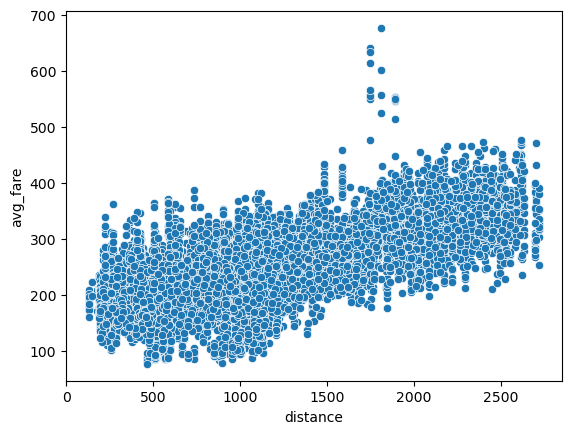

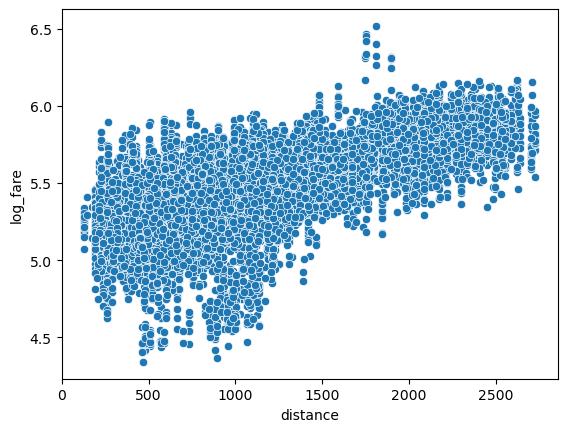

<Axes: xlabel='dist_sq', ylabel='avg_fare'>

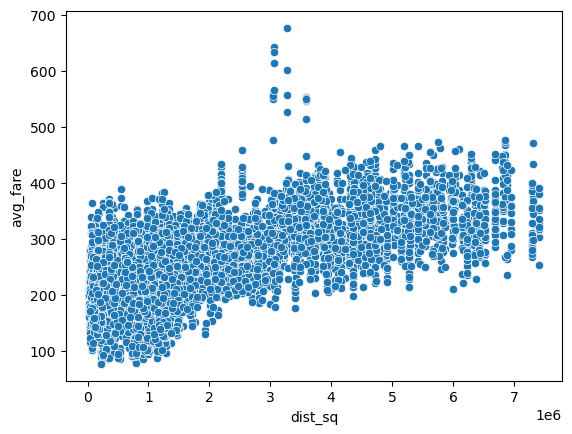

In [5]:
sns.histplot(x = "avg_fare", data=df)
plt.show()

sns.histplot(x="log_fare", data=df)
plt.show()

# Fare vs distance
sns.scatterplot(x="distance", y="avg_fare", data=df)
plt.show()
sns.scatterplot(x="distance", y="log_fare", data=df)
plt.show()
sns.scatterplot(x="dist_sq",y="avg_fare", data=df)

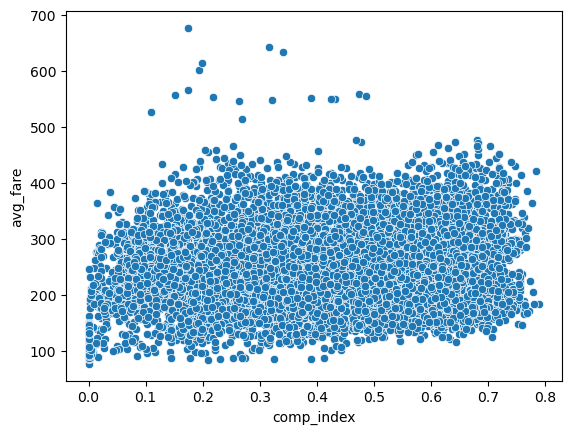

In [6]:
sns.scatterplot(x="comp_index", y="avg_fare", data=df)
plt.show()

<Axes: xlabel='lowest_fare_carrier', ylabel='avg_fare'>

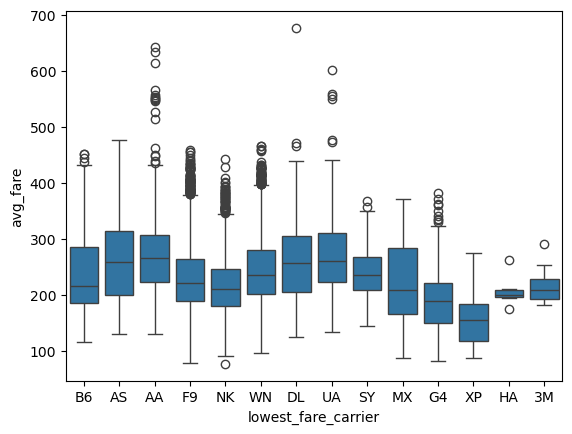

In [7]:
sns.boxplot(x="lowest_fare_carrier", y="avg_fare", data=df)

<Axes: xlabel='lowest_fare_carrier', ylabel='avg_fare'>

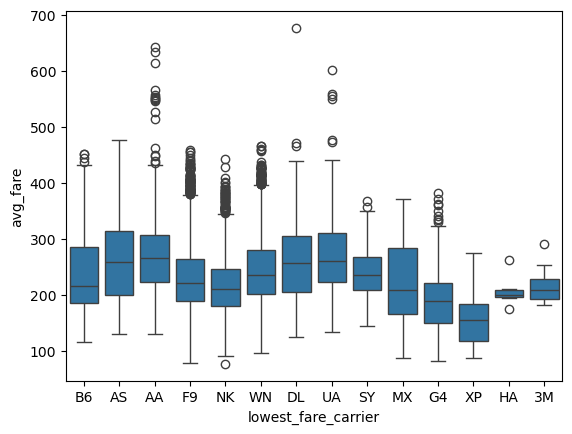

In [8]:
sns.boxplot(x="lowest_fare_carrier", y="avg_fare", data=df)

## Models

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [10]:
# Feature set
features = ["distance",
            "passengers",
            "comp_index",
            "dom_share",
            "lcc_share",
            "market_size",
            "hub_city1", 
            "hub_city2",
            "hub_to_hub",
            "TotalPerPrem_city1",
            "TotalPerPrem_city2",
            "TotalPerLFMkts_city1",
            "TotalPerLFMkts_city2"
]

X = df[features]
y = df["log_fare"]

In [11]:
# Split dataset into train and test sets (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42)

### Linear Model

In [12]:
# Fitting linear model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear model performance metrics")
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)

coef = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": linear_model.coef_
})

print(coef.sort_values(by="Coefficient", ascending=False))

Linear model performance metrics
RMSE: 0.15050141138051573
MAE: 0.11741311633827096
R2: 0.6939455825681816
                 Feature   Coefficient
9     TotalPerPrem_city1  8.011369e-01
10    TotalPerPrem_city2  6.896722e-01
3              dom_share  6.629598e-02
8             hub_to_hub  3.680369e-02
12  TotalPerLFMkts_city2  3.278224e-02
11  TotalPerLFMkts_city1  1.816822e-02
0               distance  3.186695e-04
5            market_size -2.940825e-09
1             passengers -1.587676e-05
6              hub_city1 -3.723240e-02
7              hub_city2 -5.758805e-02
2             comp_index -6.629598e-02
4              lcc_share -1.530295e-01


### Lasso Regression

In [13]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [14]:
# Fitting LASSO model
# Shows which variables are NOT important in predicting fare with linear regression
lasso_model = Pipeline([("scaler", StandardScaler()),
                        ("lasso", LassoCV(cv=5,
                                          random_state=42,
                                          max_iter=10000))])

lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
r2 = r2_score(y_test, lasso_pred)
best_alpha = lasso_model.named_steps["lasso"].alpha_

print("Optimal alpha:", best_alpha)
print("RMSE:", rmse)
print("R2:", r2)

lasso_coef = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lasso_model.named_steps["lasso"].coef_
})

print(lasso_coef.sort_values(by="Coefficient", key=abs, ascending=False))

Optimal alpha: 0.00017187668193787653
RMSE: 0.15052064808879614
R2: 0.6938673393709464
                 Feature  Coefficient
0               distance     0.187990
9     TotalPerPrem_city1     0.085269
10    TotalPerPrem_city2     0.082400
4              lcc_share    -0.034520
1             passengers    -0.023991
2             comp_index    -0.022712
7              hub_city2    -0.018630
6              hub_city1    -0.014641
5            market_size    -0.007384
12  TotalPerLFMkts_city2     0.004312
8             hub_to_hub     0.003745
11  TotalPerLFMkts_city1     0.002201
3              dom_share     0.000000


### XGBoost

In [15]:
from xgboost import XGBRegressor

In [16]:
# Fitting XGBoost model
xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective="reg:squarederror"
)

xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
mae = mean_absolute_error(y_test, xgb_pred)
r2 = r2_score(y_test, xgb_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)

importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": xgb_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(importance)

RMSE: 0.09566191106844942
MAE: 0.07272799035665953
R2: 0.8763495753503475
                 Feature  Importance
0               distance    0.326749
9     TotalPerPrem_city1    0.106413
10    TotalPerPrem_city2    0.087442
3              dom_share    0.082312
2             comp_index    0.074437
4              lcc_share    0.072967
5            market_size    0.051425
1             passengers    0.048158
7              hub_city2    0.041161
11  TotalPerLFMkts_city1    0.040638
12  TotalPerLFMkts_city2    0.037468
6              hub_city1    0.024377
8             hub_to_hub    0.006452


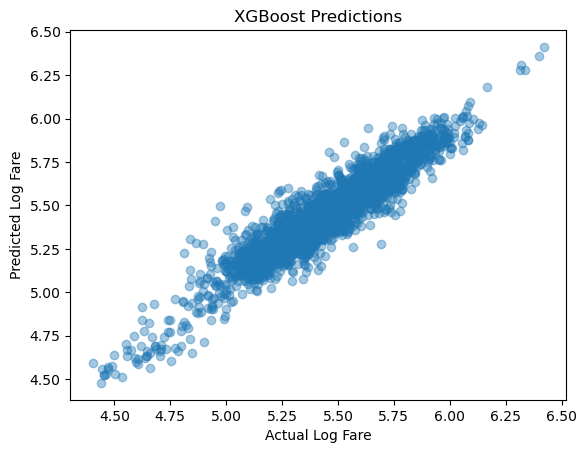

In [17]:
# XGBoost actual vs predicted 
plt.scatter(y_test, xgb_pred, alpha=0.4)
plt.xlabel("Actual Log Fare")
plt.ylabel("Predicted Log Fare")
plt.title("XGBoost Predictions")
plt.show()

#### SHAP values

In [18]:
import shap

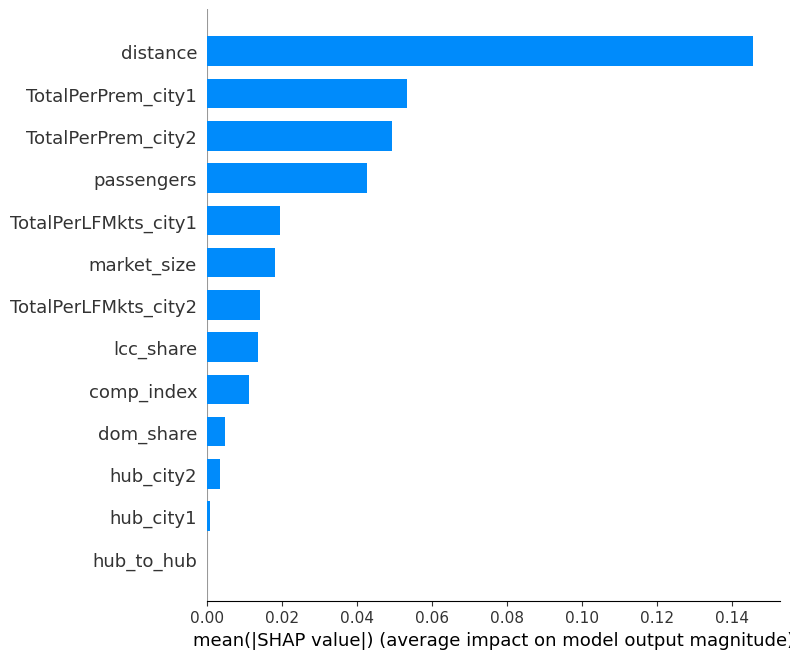

In [19]:
# SHAP analysis
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# Shows impact of each feature on output
shap.summary_plot(shap_values, X_test, plot_type = "bar")

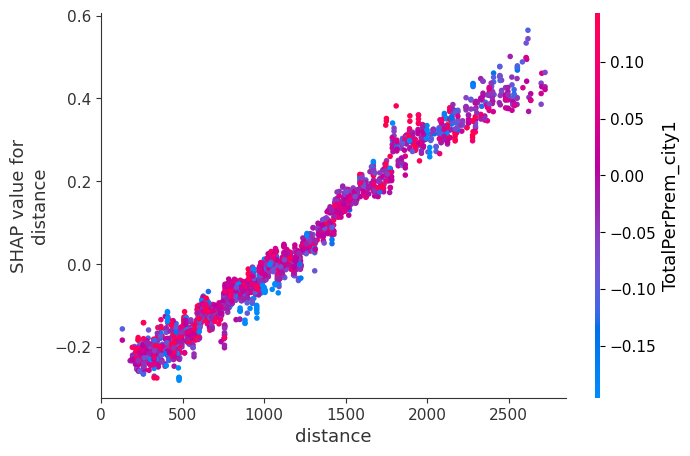

In [20]:
shap.dependence_plot(
    "distance",
    shap_values,
    X_test
)